In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from src.dataloaders import UNetFPathDataset, UNetFPathLazyDataset

In [2]:
dataset = UNetFPathLazyDataset("/home/joono/VTFSketch/dataset/train.yaml")

In [3]:
vtf, img, target = dataset[0]
vtf, img, target = np.array(vtf), np.array(img), np.array(target)

vtf.shape, img.shape, target.shape

((21, 1024, 1024), (3, 1024, 1024), (1, 1024, 1024))

In [4]:
def draw_img(img):
    plt.figure(figsize=(10.24, 10.24))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

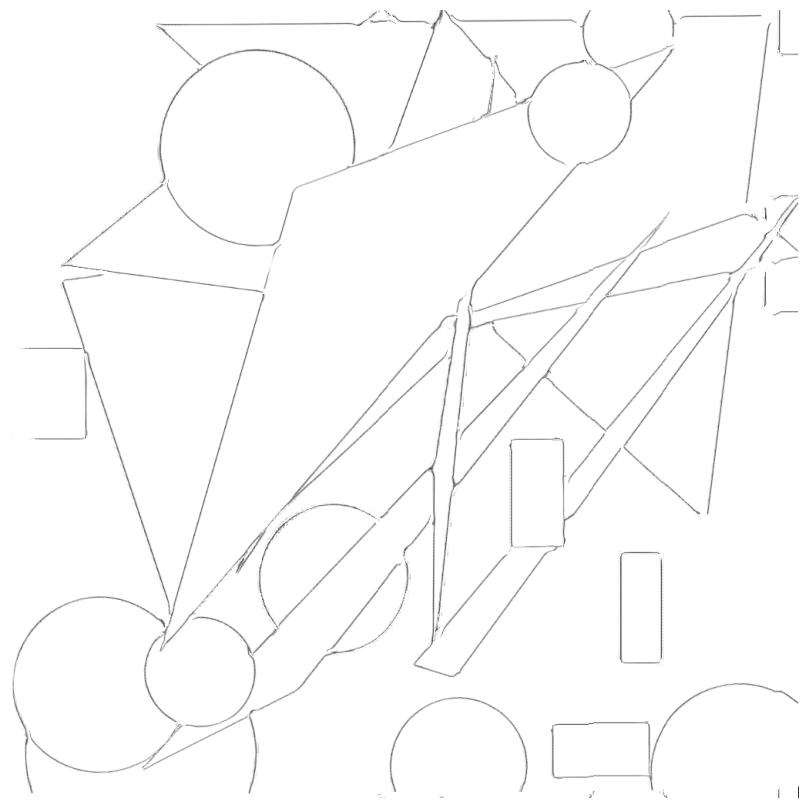

In [5]:
infodraw = vtf[10]
draw_img(infodraw)

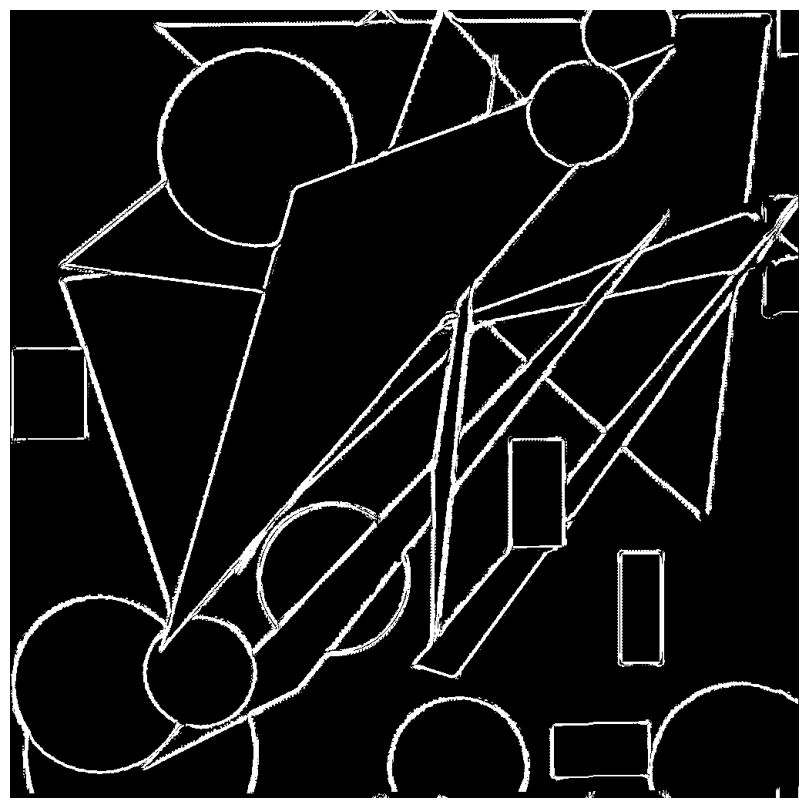

In [6]:
draw_img(infodraw != 1.0)

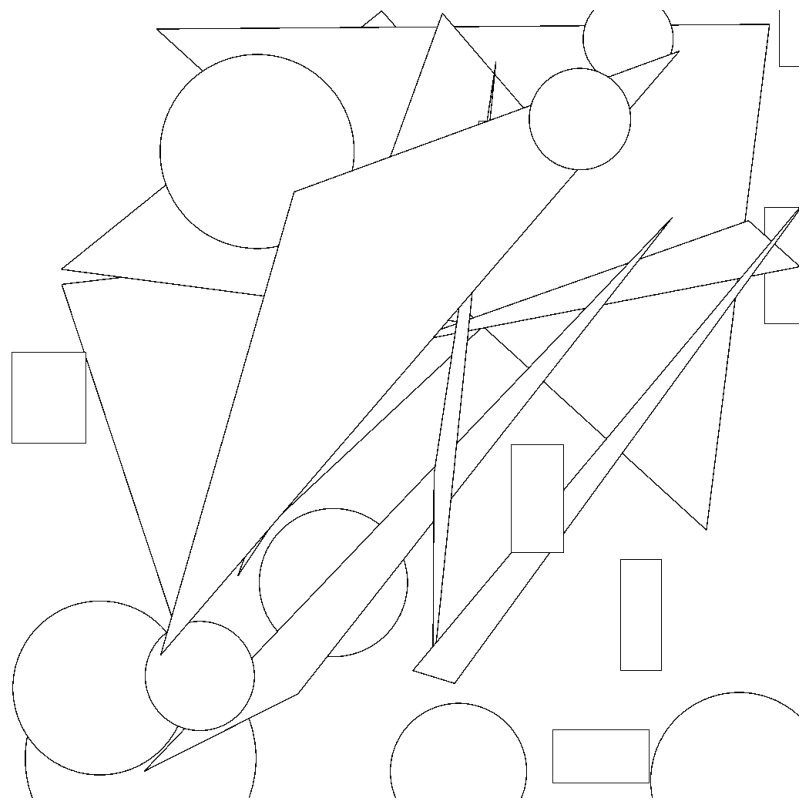

In [7]:
target_img = target[0]
draw_img(target_img)

In [ ]:
cv2.imwrite("target1024x1024.png", np.array(target_img)*255)

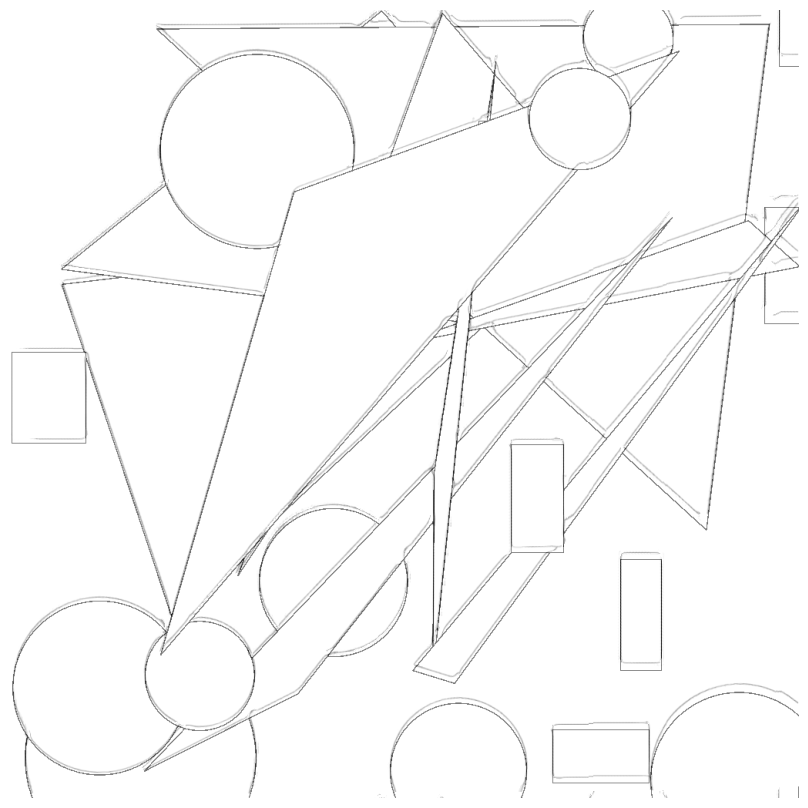

In [8]:
draw_img(vtf[10] * 0.5 + target_img * 0.5)

In [9]:
infodraw.shape, target_img.shape

((1024, 1024), (1024, 1024))

In [18]:
infodraw_origin = cv2.imread("/home/joono/VTFSketch/color_100_out.png")
infodraw_origin = cv2.cvtColor(infodraw_origin, cv2.COLOR_BGR2GRAY)
infodraw_origin = np.array(infodraw_origin, dtype=np.float32) / 255
infodraw_origin = np.clip(infodraw_origin, 0.0, 1.0)

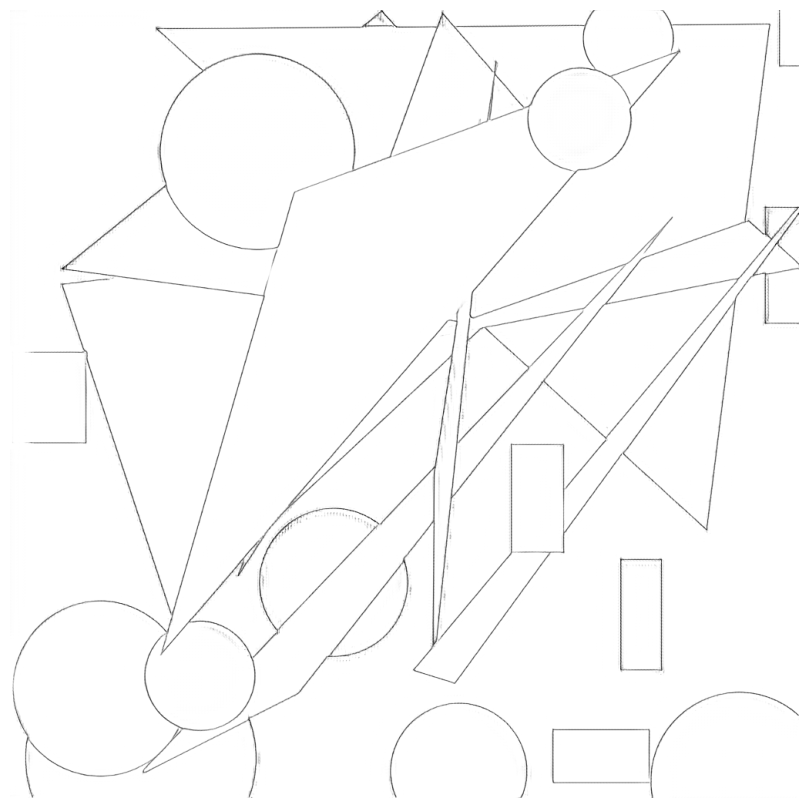

In [19]:
draw_img(infodraw_origin)

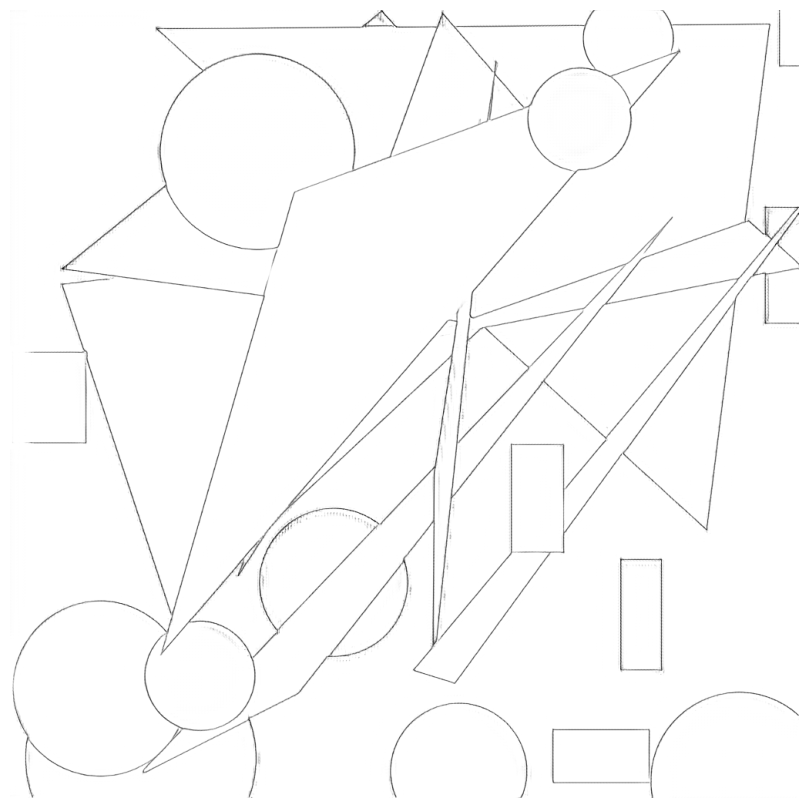

In [20]:
draw_img(infodraw_origin)

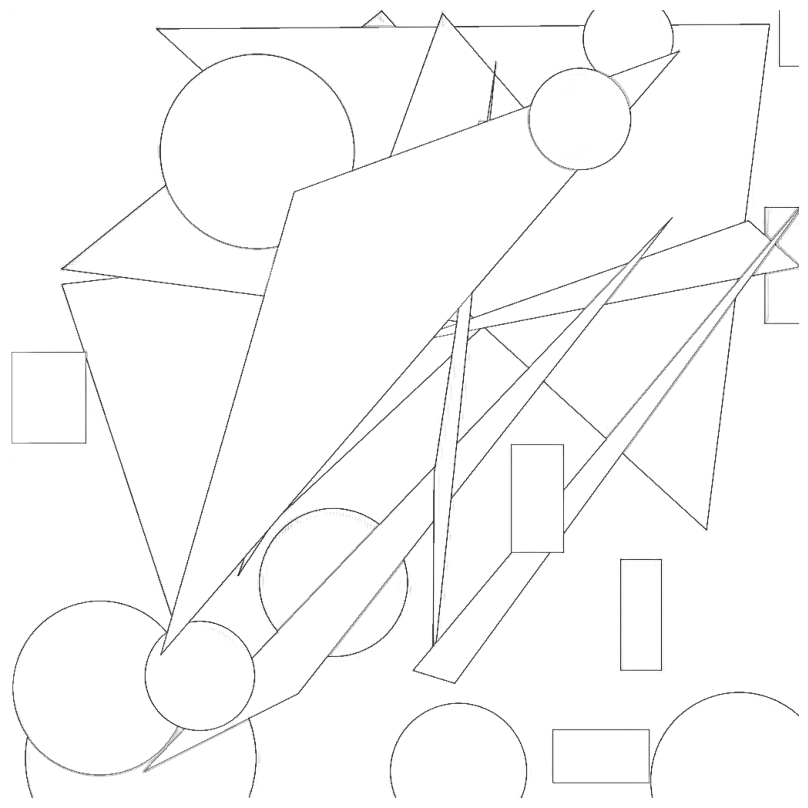

In [21]:
draw_img(infodraw_origin * 0.5 + target_img * 0.5)

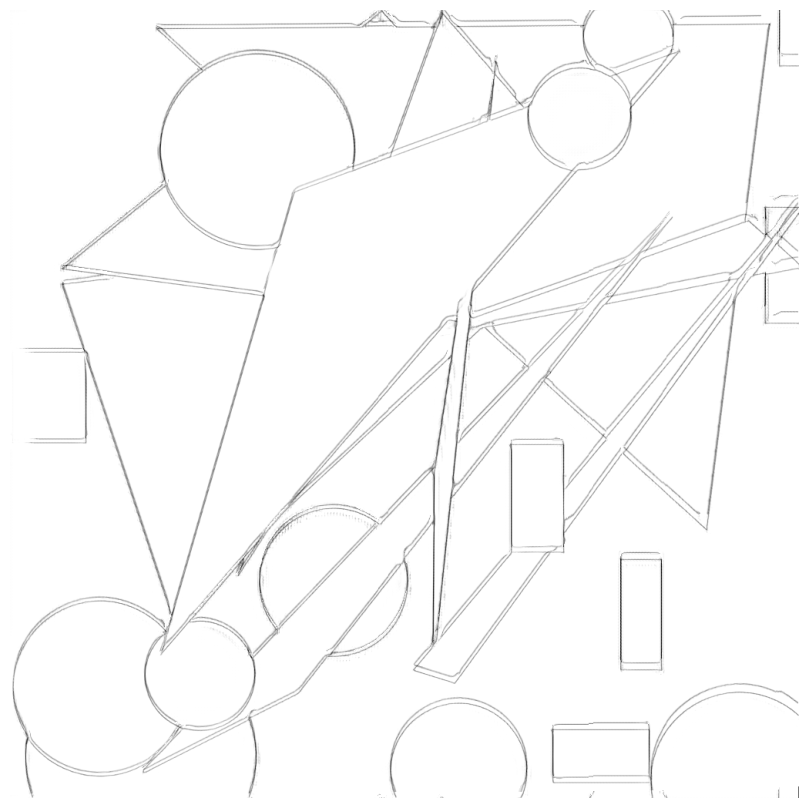

In [26]:
vtf_infodraw_origin_infodraw_overlap = infodraw*0.5 + infodraw_origin*0.5
draw_img(vtf_infodraw_origin_infodraw_overlap)

In [28]:
cv2.imwrite("vtf_infodraw_origin_infodraw_overlap.png", vtf_infodraw_origin_infodraw_overlap * 255)

True

In [48]:
canvas = np.ones((1024, 1024, 3))
canvas[:, :, 0] = infodraw
canvas[:, :, 1] = infodraw_origin

np.min(canvas), np.max(canvas)

(0.0, 1.0)

True

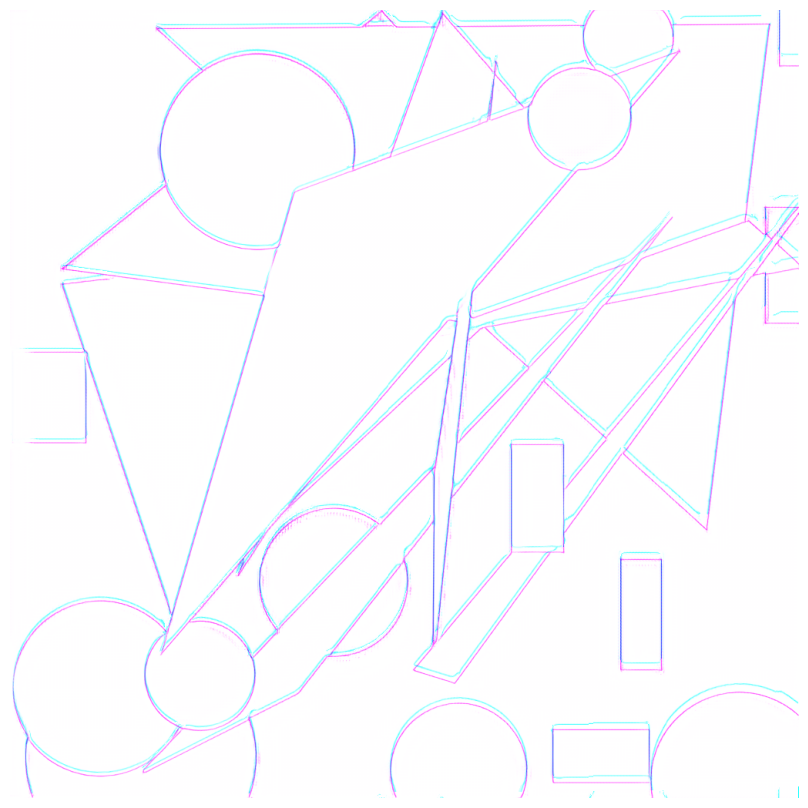

In [53]:
plt.figure(figsize=(10.24, 10.24))
plt.imshow(canvas)
plt.axis('off')

bgr_canvas = cv2.cvtColor(np.array(canvas * 255, np.uint8), cv2.COLOR_RGB2BGR)
cv2.imwrite("vtf_infodraw_origin_infodraw_overlap_color.png", bgr_canvas)

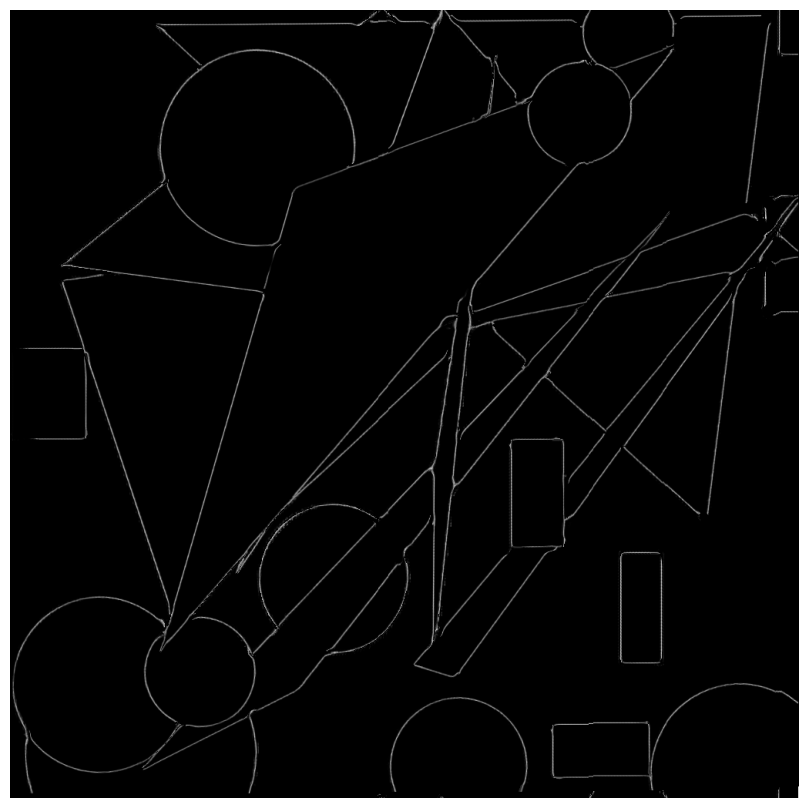

In [35]:
draw_img(1 - infodraw)

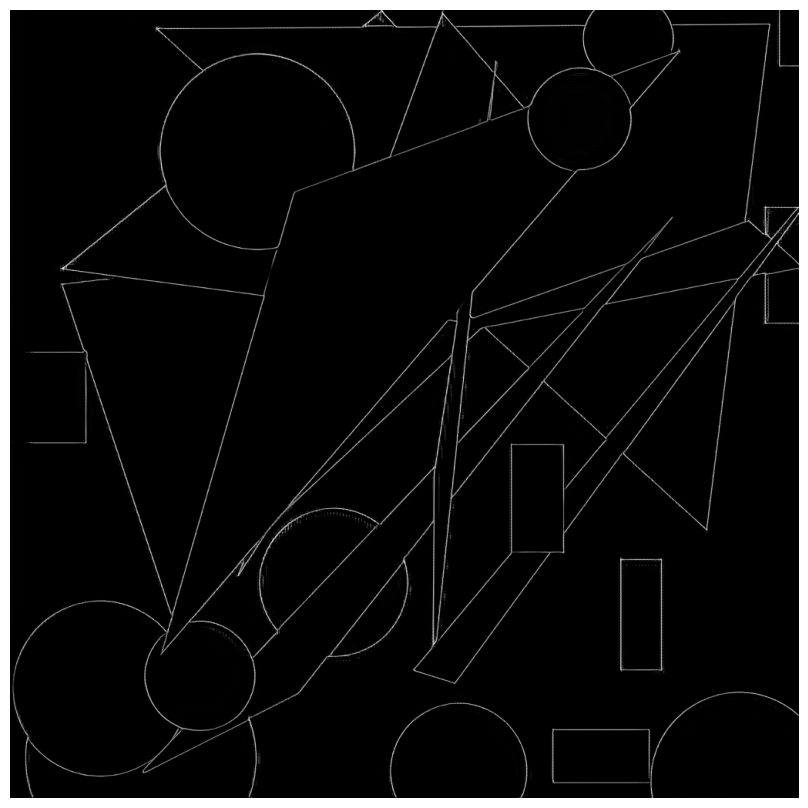

In [36]:
draw_img(1-infodraw_origin)